# Load The Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df.columns

C:\Users\User\AppData\Local\Temp\ipykernel_9880\3882749003.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [2]:
from sklearn.model_selection import train_test_split

def my_train_test():
    X = df.iloc[:, 1:]
    y = df[["Year"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

def my_train_validation_test():
    X = df.iloc[:, 1:]
    y = df[["Year"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    return(X_train, X_val, y_train, y_val, X_test, y_test)

In [3]:
X_train, X_test, y_train, y_test = my_train_test()

# Show Data Distribution

In [5]:
import matplotlib.pyplot as plt

def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

In [6]:
#histogram("S10") #Essendo un problema di regressione non direi che il seguente dataset risulta sbilanciato


In [7]:
#boxplot_y()

In [8]:
#all_histograms(X_train)

In [9]:
#density_plots(X_train)


# Pre-processing

In [10]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [11]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def norm(df, column_name, order):
    x = df[column_name]
    x_norm1 = np.linalg.norm(x, ord=order)
    x_normalized = x / x_norm1
    df[column_name] = x_normalized
    #plot_norm(x, x_normalized)
    if order == 1:
        print(sum(x_normalized))
    if order == 2:
        print(sum(x_normalized**2))
    if order == np.inf:
        print(max(x_normalized))

X_train_norm1 = X_train.copy()
X_train_norm2 = X_train.copy()
X_train_normInf = X_train.copy()

In [12]:
#MinMax Scaling
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [13]:
#Standardization
scaler = preprocessing.StandardScaler()
#Addestramento
scaler.fit(X_train)
#Applicazione
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principals_components_train = pca.fit_transform(X_train_scaled)

# Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
principals_components_test = pca.transform(X_test_scaled)

#loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)], index=X_train.columns)
#print(loadings)

In [15]:
# # Calcola la media dei valori assoluti dei carichi per ciascun componente principale
# mean_abs_loadings = loadings.abs().mean()

# # Ordina i carichi in ordine decrescente di importanza
# sorted_loadings = mean_abs_loadings.sort_values(ascending=False)

# print("Componenti Principali più importanti:")
# print(sorted_loadings)


In [16]:
# # Calcola gli autovalori dall'oggetto PCA
# eigenvalues = pca.explained_variance_

# # Visualizza gli autovalori
# print("Autovalori dei Componenti Principali:")
# for i, eig in enumerate(eigenvalues, 1):
#     print(f"PC{i}: {eig}")

# # Puoi anche visualizzarli in un grafico a barre per una migliore comprensione della distribuzione
# plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
# plt.xlabel('Componente Principale')
# plt.ylabel('Autovalore')
# plt.title('Autovalori dei Componenti Principali')
# plt.show()

In [17]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Considerando che principals_components è un array numpy con tre colonne
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Estraiamo le colonne per l'asse x, y e z
# x = principals_components_train[:, 0]
# y = principals_components_train[:, 1]
# z = principals_components_train[:, 2]

# # Plot dello scatter tridimensionale
# ax.scatter(x, y, z, c=y_train['Year'], marker='o')

# # Etichette degli assi
# ax.set_xlabel('Componente Principale 1')
# ax.set_ylabel('Componente Principale 2')
# ax.set_zlabel('Componente Principale 3')

# plt.title('Scatter Plot dei Componenti Principali')
# plt.show()


In [18]:
# # Set a threshold for which features to extract
# threshold = 0.3

# # Find features with loadings above the threshold for each principal component
# important_features = {}
# for column in loadings.columns:
#     important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# # Now 'important_features' dictionary contains the important features for each PC
# for pc, features in important_features.items():
#     print(f"{pc}: {', '.join(features)}")

In [19]:
# # Create a scree plot
# plt.figure(figsize=(8,5))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
# plt.title('Scree Plot')
# plt.xlabel('Number of components')
# plt.ylabel('Explained variance ratio')
# plt.show()

# # Calculate cumulative explained variance
# cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# # Create a plot for cumulative explained variance
# plt.figure(figsize=(8,5))
# plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
# plt.title('Cumulative Explained Variance')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.axhline(y=0.9, color='r', linestyle='-')  # 90% variance line
# plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
# plt.show()

# Modeling

Linear-Regressor

In [20]:
#Linear-Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)

predizioni = reg.predict(X_test)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.06098943629034
Coefficienti di determinazione R²: 0.2305423370961881


In [21]:
reg = LinearRegression().fit(X_train_scaled, y_train)

predizioni = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188


In [22]:
reg = LinearRegression().fit(X_train_minmax, y_train)

predizioni = reg.predict(X_test_minmax)

mse = mean_squared_error(y_test, predizioni)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predizioni)
print("Coefficienti di determinazione R²:", r_squared)

Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188


In [23]:
# Addestra un regressore lineare utilizzando i componenti principali
reg = LinearRegression()
reg.fit(principals_components_train, y_train)

# Fai previsioni sul set di test utilizzando il modello addestrato
predictions = reg.predict(principals_components_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y_test, predictions)
print("Coefficienti di determinazione R²:", r_squared)


Mean Squared Error (MSE): 105.9742870744783
Coefficienti di determinazione R²: 0.029957560492114177


Random-Forest-Regressor

In [24]:
# from sklearn.ensemble import RandomForestRegressor

# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_regressor.fit(principals_components_train, y_train)
# rf_predictions = rf_regressor.predict(principals_components_test)
# mse = mean_squared_error(y_test, rf_predictions)
# rf_r_squared = r2_score(y_test, rf_predictions)

# print("Mean Squared Error (MSE):", mse)
# print("Coefficienti di determinazione R²:", r_squared)

In [25]:
# from sklearn.ensemble import RandomForestRegressor

# n_estimators_values = [10, 50, 100, 200, 300]
# mse_values = []

# for n_estimators in n_estimators_values:
#     modello_random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
#     modello_random_forest.fit(X_train, y_train)
    
#     predizioni_val = modello_random_forest.predict(X_val)
    
#     mse_val = mean_squared_error(y_val, predizioni_val)
    
#     mse_values.append(mse_val)

# # Plot dei risultati
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_values, mse_values, marker='o', linestyle='-')
# plt.title('MSE al variare del numero di alberi nel RandomForestRegressor')
# plt.xlabel('Numero di alberi')
# plt.ylabel('MSE')
# plt.grid(True)
# plt.show()

SVM

In [26]:
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.svm import SVR

# # Definisci la griglia dei parametri da testare
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [1, 10, 50, 100]
# }

# # Inizializza il regressore SVM
# svm_regressor = SVR()

# # Definisci il numero di fold per la cross-validation
# num_folds = 5

# # Inizializza il KFold
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Crea un oggetto GridSearchCV per trovare i migliori parametri con la k-fold cross-validation
# grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

# # Esegui la cross-validation per trovare i migliori parametri
# grid_search.fit(principals_components_train, y_train)

# # Stampa i migliori parametri trovati
# print("Migliori parametri:", grid_search.best_params_)

# # Valuta il modello con la migliore combinazione di parametri
# best_svm_regressor = grid_search.best_estimator_

# # Valuta il modello sui dati di test
# y_pred = best_svm_regressor.predict(principals_components_test)
# mse_test = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error sui dati di test:", mse_test)


KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

neig = KNeighborsRegressor(n_neighbors=1)
neig.fit(principals_components_train, y_train)
y_pred = neig.predict(principals_components_test)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error sui dati di test:", mse_test)
rf_r_squared = r2_score(y_test, y_pred)
print("Coefficienti di determinazione R²:", r_squared)


Mean Squared Error sui dati di test: 199.00836720531376
Coefficienti di determinazione R²: 0.029957560492114177


In [28]:
X_train, X_val, y_train, y_val, X_test, y_test = my_train_validation_test()
#Standardization
scaler = preprocessing.StandardScaler()
#Addestramento
scaler.fit(X_train)
#Applicazione
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

pca = PCA(n_components=5)
principals_components_train = pca.fit_transform(X_train_scaled)

# Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
principals_components_test = pca.transform(X_test_scaled)
principals_components_val = pca.transform(X_val_scaled)


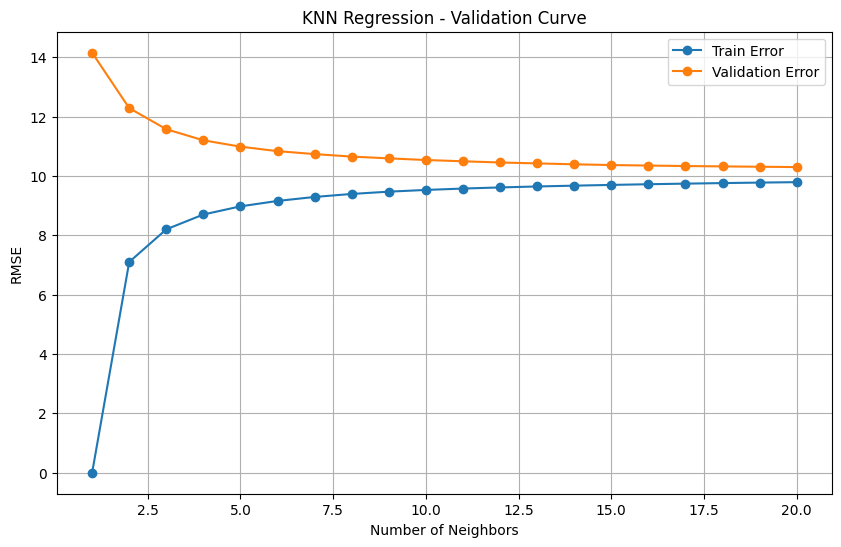

Miglior numero di vicini: 20
Mean Squared Error sui dati di validation: 104.56951893526319
Coefficienti di determinazione R² sui dati di validation: 0.04560494361560807


In [29]:
from sklearn.model_selection import GridSearchCV

# Definisci il range di iperparametri per il numero di vicini
param_grid = {'n_neighbors': np.arange(1, 21)}

# Inizializza il KNN Regressor
knn = KNeighborsRegressor()

# Inizializza la ricerca grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(principals_components_train, y_train)

# Estrai i risultati della ricerca grid
train_scores = np.sqrt(-grid_search.cv_results_['mean_train_score']) # Mean Squared Error sul train set
test_scores = np.sqrt(-grid_search.cv_results_['mean_test_score']) # Mean Squared Error sul test set
neighbors = param_grid['n_neighbors'] # Numero di vicini

# Plot dell'ampliamento dell'errore al variare del numero di vicini
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label='Train Error', marker='o')
plt.plot(neighbors, test_scores, label='Validation Error', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.title('KNN Regression - Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

# Trova il miglior modello
best_neighbor = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Valida il miglior modello sul validation set
y_pred_val = best_model.predict(principals_components_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r_squared_val = r2_score(y_val, y_pred_val)

print("Miglior numero di vicini:", best_neighbor)
print("Mean Squared Error sui dati di validation:", mse_val)
print("Coefficienti di determinazione R² sui dati di validation:", r_squared_val)


Feed-Forward

modelli deep per Tabular Data (TabNet &
TabTransformer)